# Business Understanding

## Objetivo
 
El objetivo de mi proyecto final será hacer una modelo que haga la predicción de que si una persona sera buen o mal cliente con base en su historial crediticio y algunos parametros de su solicitud de credito

In [ ]:
# Importamos las librerias
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Obtener información

La información que ocuparemos fue conseguida de la página Kaggle (https://www.kaggle.com/rikdifos/credit-card-approval-prediction) y son 2 archivos:

1) credit_record.csv: Este archivo contiene la siguiente información:
   
    a) ID: Id del cliente

    b) MONTHS_BALANCE: El mes de la información recopilada (este mes, el anterior, etc.)

    c) STATUS: El status del credito del cliente
2) application_record.csv
   
    a) ID: Id del solicitante
    
    b) CODE_GENDER: Género

    c) FLAG_OWN_CAR: ¿El solicitante tiene un carro?

    d) FLAG_OWN_REALTY: ¿El solicitante tiene una propiedad?

    e) CNT_CHILDREN: Número de hijos

    f) AMT_INCOME_TOTAL: Ingreso anual en dolares

    g) NAME_INCOME_TYPE: Categoria del ingreso

    h) NAME_EDUCATION_TYPE: Nivel de estudios

    i) NAME_FAMILY_STATUS: Estado civil

    j) NAME_HOUSING_TYPE: Modalidad de vivienda

    k) DAYS_BIRTH: Dias de nacido (cuenta hacia atras)

    l) DAYS_EMPLOYED: Dias empleado (cuenta hacia atras, si el número es positivo significa desempleado)

    m) FLAG_MOBIL: ¿El solicitante tiene teléfono móvil?

    n) FLAG_WORK_PHONE: ¿El solicitante tiene telefono de trabajo?

    ñ) FLAG_PHONE: ¿El solicitante tiene telefono?
 
    o) FLAG_EMAIL: ¿El solicitante tiene e-mail?

    p) OCCUPATION_TYPE: Tipo de ocupación
    
    q) CNT_FAM_MEMBERS: Tamaño de la familia

In [ ]:
## Obtenemos el dataset del historial crediticio
historial_credito = pd.read_csv('data/credit_record.csv')
## Obtenemos el dataset del registro de aplicación de credito
registro_aplicacion = pd.read_csv('data/application_record.csv')

In [ ]:
registro_aplicacion.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
historial_credito.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
## Info de los datasets
print(historial_credito.shape)
historial_credito.info()

(1048575, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
print(registro_aplicacion.shape)
registro_aplicacion.info()

(438557, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG

In [ ]:
## Numero de datos nulos y su porcentaje en las columnas
porcentaje_nulos = registro_aplicacion.isnull().mean().round(4) * 100
pd.merge(registro_aplicacion.isnull().sum().reset_index(), porcentaje_nulos.reset_index(), how='inner', on='index', suffixes=("_Valores Nulos", "_Porcentaje de valores nulos"))

,index,0_Valores Nulos,0_Porcentaje de valores nulos
0,ID,0,0.0
1,CODE_GENDER,0,0.0
2,FLAG_OWN_CAR,0,0.0
3,FLAG_OWN_REALTY,0,0.0
4,CNT_CHILDREN,0,0.0
5,AMT_INCOME_TOTAL,0,0.0
6,NAME_INCOME_TYPE,0,0.0
7,NAME_EDUCATION_TYPE,0,0.0
8,NAME_FAMILY_STATUS,0,0.0
9,NAME_HOUSING_TYPE,0,0.0


### Datos Nulos
La data del historial crediticio no presenta nulos, sin embargo la data de la solicitud presenta en su penultima columna (Tipo de Ocupación) 134,203 datos nulos que representa el 30.59% de los datos.

## Data Wrangling 

In [ ]:
## Combinar ambos dataframes para hacer un concentrado por ID
data = pd.merge(historial_credito, registro_aplicacion, how='inner', on='ID')
data

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,5150487,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,5150487,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,5150487,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


Tomando en cuenta nuestro dataset unificado, hay columnas que consideramos no son muy utiles para nuestro análisis. Entre ellas estan:

1) NAME_INCOME_TYPE (Consideramos que no afecta al analisis la categoria del ingreso)
2) OCCUPATION_TYPE (El tipo de ocupación no es relevante para nuestro análisis, ademas que casi un tercio de los datos son nulos)
3) FLAG_WORK_PHONE (No afecta a nuestro analisis si el cliente tiene telefono de su trabajo)
4) FLAG_PHONE (No afecta a nuestro analisis si el cliente tiene telefono fijo)
5) FLAG_MOBIL (No afecta a nuestro análisis si el cliente tiene teléfono movil)
6) FLAG_EMAIL (No afecta a nuestro análisis si el cliente tiene correo)

Por lo tanto, las eliminaremos

In [ ]:
## Eliminamos columnas que no vamos a ocupar
data.drop(['NAME_INCOME_TYPE', 'FLAG_PHONE', 'FLAG_MOBIL', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'OCCUPATION_TYPE'], axis=1, inplace=True)

En nuestro datos tenemos información de varios meses del historial crediticio, para este análisis nos centraremos exclusivamente en el ultimo més de actividad

In [ ]:
## Nos quedamos con el último mes de actividad
data = data[data['MONTHS_BALANCE'] == 0]
data

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0
16,5008805,0,C,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0
31,5008806,0,C,M,Y,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0
61,5008808,0,0,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0
71,5008810,0,C,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777591,5150481,0,X,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0
777652,5150483,0,X,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0
777670,5150484,0,C,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0
777683,5150485,0,0,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0


Las variables DAYS_BIRTH y DAYS_EMPLOYED podemos transformarlas para que sean más claras. La primera la pasaremos a Edad para conocer la edad del cliente y la segunda la pasaremos a ser una variable booleana de Empleo o Desempleo

In [ ]:
## Creamos la variable edad
data['Edad'] = (data['DAYS_BIRTH'] / 365) * -1

## Funcion lambda
tiene_empleo = lambda x: True if x < 0 else False

# Aplicamos la función a la nueva variable
data['Empleo'] = data.DAYS_EMPLOYED.apply(tiene_empleo)

## Presentamos el DataFrame
data

<ipython-input-12-735bc8430817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Edad'] = (data['DAYS_BIRTH'] / 365) * -1
<ipython-input-12-735bc8430817>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Empleo'] = data.DAYS_EMPLOYED.apply(tiene_empleo)


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Edad,Empleo
0,5008804,0,C,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,32.890411,True
16,5008805,0,C,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,32.890411,True
31,5008806,0,C,M,Y,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,58.832877,True
61,5008808,0,0,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,52.356164,True
71,5008810,0,C,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,52.356164,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777591,5150481,0,X,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0,29.610959,True
777652,5150483,0,X,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0,29.610959,True
777670,5150484,0,C,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0,29.610959,True
777683,5150485,0,0,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,-10808,-1739,3.0,29.610959,True


In [ ]:
# Eliminamos las variables antiguas
data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

<ipython-input-13-160f3f9f692b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)


In [ ]:
# Checamos el tipo de dato de edad
print(data.Edad.dtypes)

# Lo pasamos a entero
data['Edad'] = data['Edad'].astype(int)

# Volvemos a checar el tipo de dato de edad
print(data.Edad.dtypes)

float64
int64
<ipython-input-14-7a285713298a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Edad'] = data['Edad'].astype(int)


#### Variable Target

Como se comento al inicio, nuestro objetivo es clasificar a los clientes en buenos o malos para asi decidir si otorgar o no el crédito, con esto en mente vamos a ocupar algoritmos de clasificación y vamos a necesitar nuestra variable target (buen cliente o mal cliente)

Como tal, los datos no nos proporcionan este variable target, por lo que vamos a crearla con base a la columna STATUS de nuestro dataset, vamos a catalogar como buenos clientes (con el número 1) a las personas que tengan este status (C, X, 0) ya que son personas que no tienen un prestamo, lo han pagado por completo este mes o tienen un mes de vencido. El resto de status (1-5) seran catalogados como malos clientes (con número 0) ya que tienen algun atraso mayor a 30 dias en sus prestamos.

In [ ]:
# Vamos a renombrar la variable STATUS como target y vamos a reorganizar su contenido
target = lambda x: 1 if x in ('C', 'X', '0') else 0
data['Target'] = data.STATUS.apply(target)
data

<ipython-input-15-9f1714e3feac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data.STATUS.apply(target)


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,Edad,Empleo,Target
0,5008804,0,C,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,2.0,32,True,1
16,5008805,0,C,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,2.0,32,True,1
31,5008806,0,C,M,Y,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,2.0,58,True,1
61,5008808,0,0,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,1.0,52,True,1
71,5008810,0,C,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,1.0,52,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777591,5150481,0,X,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,3.0,29,True,1
777652,5150483,0,X,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,3.0,29,True,1
777670,5150484,0,C,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,3.0,29,True,1
777683,5150485,0,0,F,Y,Y,1,157500.0,Secondary / secondary special,Married,House / apartment,3.0,29,True,1


In [ ]:
# Vemos como esta la proporción de los buenos con los malos
data.Target.value_counts()

1    24347
0      325
Name: Target, dtype: int64

Como podemos ver, la proporción entre buenos y malos clientes es bastante grande. Habra que tenerlo muy en cuenta a la hora de hacer nuestro modelo de machine learning.

Como último paso,vamos a eliminar las variables MONTHS_BALANCE, STATUS, CODE_GENDER, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE y NAME_EDUCATION_TYPE ya que no seran consideradas para la predicción. Junto a esto, tambien pasaremos el ID a que sea el indice y convertiremos las variables booleanas (FLAG_OWN_CAR, FLAG_OWN_REALTY, Empleo) a su contra parte en número.

In [ ]:
# Eliminamos las columnas no necesarias
data_procesada = data.drop(['MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE'], axis=1)
data_procesada

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Edad,Empleo,Target
0,5008804,Y,Y,0,427500.0,2.0,32,True,1
16,5008805,Y,Y,0,427500.0,2.0,32,True,1
31,5008806,Y,Y,0,112500.0,2.0,58,True,1
61,5008808,N,Y,0,270000.0,1.0,52,True,1
71,5008810,N,Y,0,270000.0,1.0,52,True,1
...,...,...,...,...,...,...,...,...,...
777591,5150481,Y,Y,1,157500.0,3.0,29,True,1
777652,5150483,Y,Y,1,157500.0,3.0,29,True,1
777670,5150484,Y,Y,1,157500.0,3.0,29,True,1
777683,5150485,Y,Y,1,157500.0,3.0,29,True,1


In [ ]:
# Ponemos el ID como index
data_procesada.set_index('ID', inplace=True)

In [ ]:
# Hacemos el cambio de variables booleanas a número
data_procesada.FLAG_OWN_CAR = data_procesada.FLAG_OWN_CAR.replace({"Y": 1, "N": 0})
data_procesada.FLAG_OWN_REALTY = data_procesada.FLAG_OWN_REALTY.replace({"Y": 1, "N": 0})
data_procesada.Empleo = data_procesada.Empleo.replace({True: 1, False: 0})

Una vez hecho estos ajustes, nuestros datos estan listos para ser ocupados en nuestros siguientes pasos.

In [ ]:
data_procesada

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Edad,Empleo,Target
ID,,,,,,,,
5008804,1,1,0,427500.0,2.0,32,1,1
5008805,1,1,0,427500.0,2.0,32,1,1
5008806,1,1,0,112500.0,2.0,58,1,1
5008808,0,1,0,270000.0,1.0,52,1,1
5008810,0,1,0,270000.0,1.0,52,1,1
...,...,...,...,...,...,...,...,...
5150481,1,1,1,157500.0,3.0,29,1,1
5150483,1,1,1,157500.0,3.0,29,1,1
5150484,1,1,1,157500.0,3.0,29,1,1


## Exploratory Data Analysis (EDA)

### Análisis Estadístico

In [ ]:
data_procesada.describe().round()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Edad,Empleo,Target
count,24672.0,24672.0,24672.0,24672.0,24672.0,24672.0,24672.0,24672.0
mean,0.0,1.0,0.0,187075.0,2.0,43.0,1.0,1.0
std,0.0,0.0,1.0,102095.0,1.0,11.0,0.0,0.0
min,0.0,0.0,0.0,27000.0,1.0,20.0,0.0,0.0
25%,0.0,0.0,0.0,121500.0,2.0,34.0,1.0,1.0
50%,0.0,1.0,0.0,157500.0,2.0,42.0,1.0,1.0
75%,1.0,1.0,1.0,225000.0,3.0,53.0,1.0,1.0
max,1.0,1.0,19.0,1575000.0,20.0,68.0,1.0,1.0


Junto con los datos estadisticos del dataset, veremos unas graficas para ver la distribución de nuestros datos

#### Distribución de las variables

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

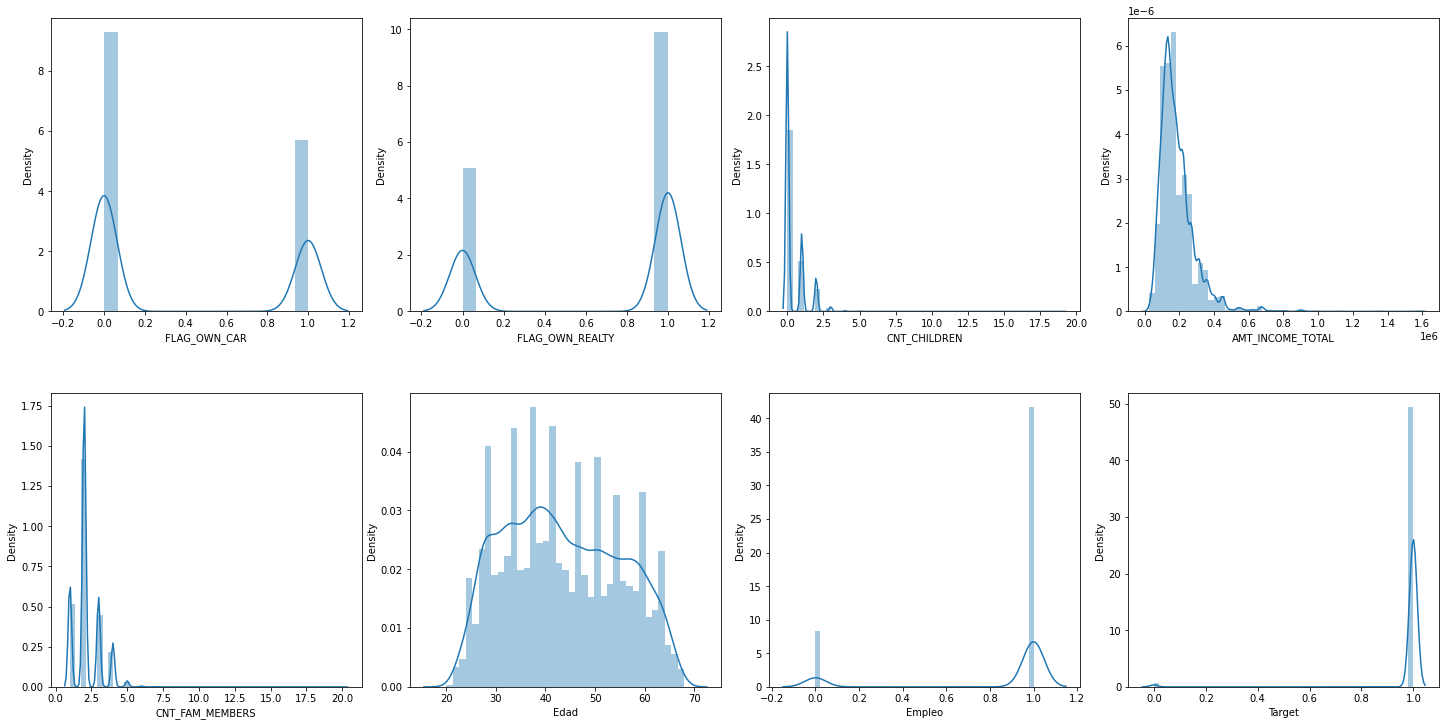

In [ ]:
# Histogramas

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data_procesada.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Como podemos ver en las gráficas, tenemos varias situaciones con los datos:

1) Las variables FLAG_OWN_CAR, FLAG_OWN_REALTY, Empleo y Target son variables discretas y su distribución esta entre el 0 y 1. De estas podemos ver que Target y Empleo estan desbalanceadas con casi todos los datos de un lado

2) Las variables CNT_CHILDREN, AMT_INCOME_TOTAL y CNT_FAM_MEMBERS presentan datos outliers y junto a esto la variable de Ingreso Anual Total (AMT_INCOME_TOTAL) tiene una distribución asimétrica.

### Valores extremos u outliers

Vamos a verficar estas variables más a fondo para ver sus valores extremos.

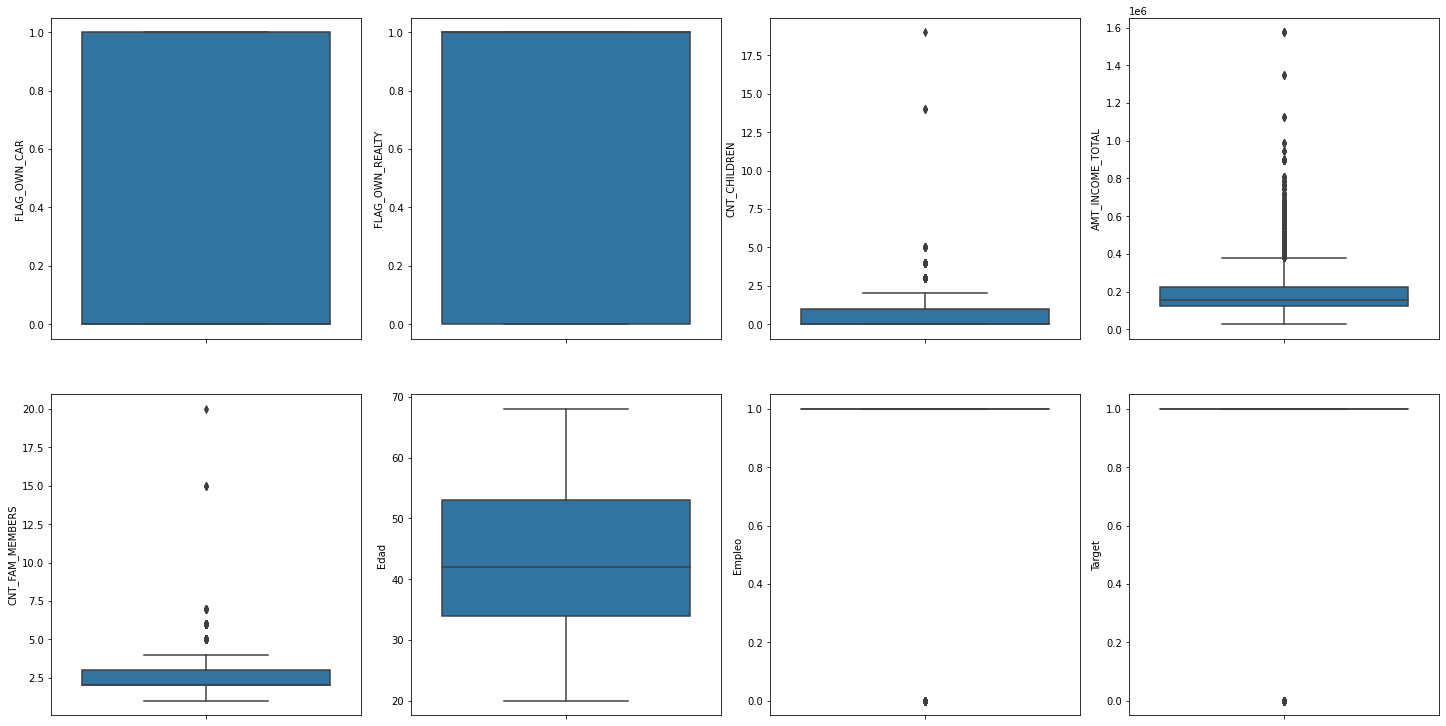

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data_procesada.items():
    sns.boxplot(y=k, data=data_procesada, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Como muestran las gráficas, confirmamos que las variables que habiamos identificado antes (CNT_CHILDREN, AMT_INCOME_TOTAL y CNT_FAM_MEMBERS) tienen outliers que pueden afectar nuestro modelo, veamos el porcentaje por columna.

In [ ]:
for k, v in data_procesada.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data_procesada)[0]
    print("Variable %s outliers = %.2f%%" % (k, perc))

Variable FLAG_OWN_CAR outliers = 0.00%
Variable FLAG_OWN_REALTY outliers = 0.00%
Variable CNT_CHILDREN outliers = 1.41%
Variable AMT_INCOME_TOTAL outliers = 4.27%
Variable CNT_FAM_MEMBERS outliers = 1.34%
Variable Edad outliers = 0.00%
Variable Empleo outliers = 100.00%
Variable Target outliers = 100.00%


Como podemos ver, los outliers en esas variables no pasan del 5% de los datos por lo que procederemos a borrar esos datos con el fin de que no hagan ruido al hacer nuestro modelo de predición.

In [ ]:
data_limpia = data_procesada[data_procesada.AMT_INCOME_TOTAL <= 387000]
data_limpia = data_limpia[data_procesada.CNT_CHILDREN <= 2]
data_limpia = data_limpia[data_procesada.CNT_FAM_MEMBERS <= 4]

<ipython-input-25-bf4e26441da1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_limpia = data_limpia[data_procesada.CNT_CHILDREN <= 2]
<ipython-input-25-bf4e26441da1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_limpia = data_limpia[data_procesada.CNT_FAM_MEMBERS <= 4]


In [ ]:
# Comparamos las filas entre dataframes
print(data_procesada.shape)
print(data_limpia.shape)

(24672, 8)
(23409, 8)


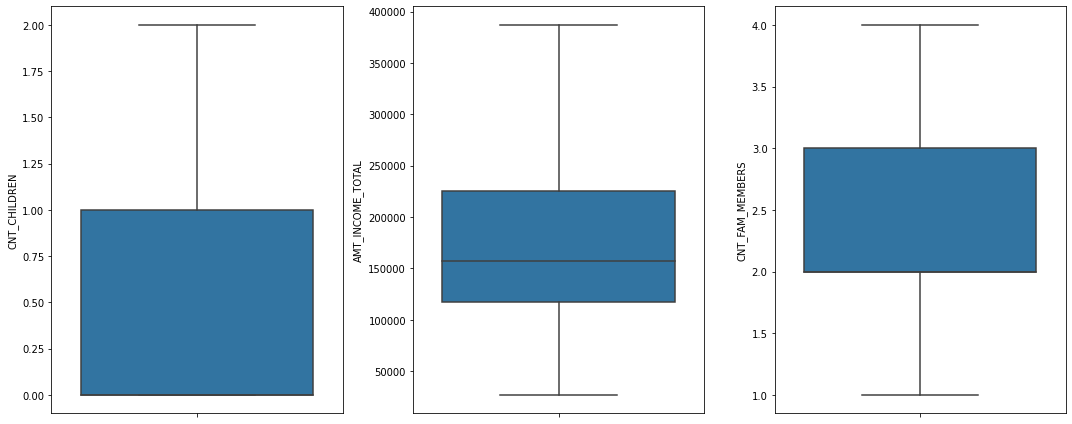

In [ ]:
# Checamos que ya no haya outliers
variables = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=data_limpia, ax=ax)
plt.tight_layout()
plt.show()

### Correlación

Para terminar nuestro análisis, veremos la correlación de nuestras variables para ver como se relacionan entre ellas.

<AxesSubplot:>

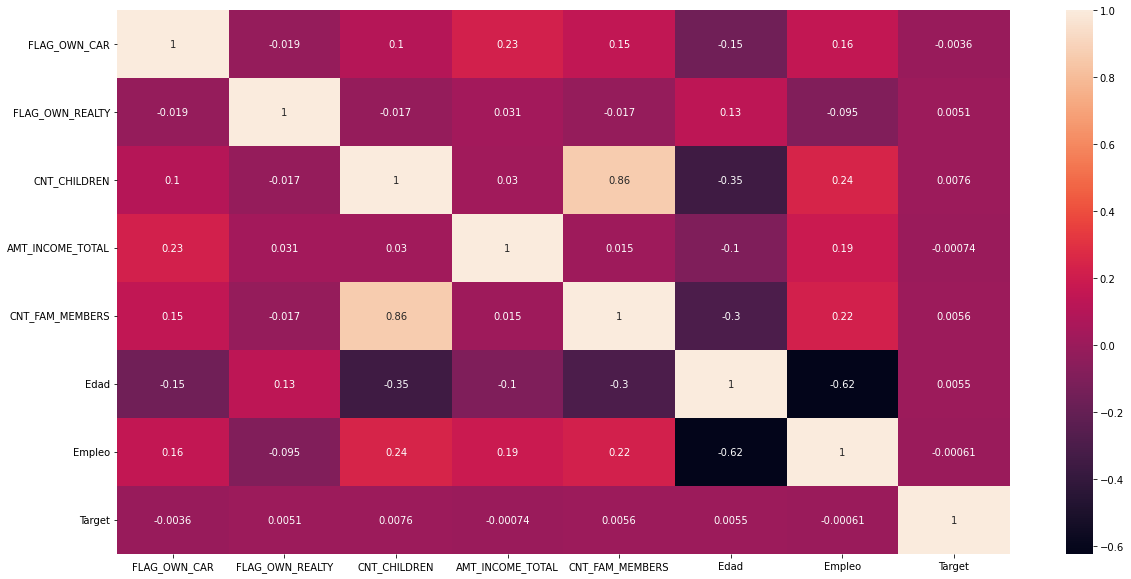

In [ ]:
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(20,10)) #Defino el tamaño del grafico

## Definimos la correlación
sns.heatmap(data_limpia.corr(), annot=True)

Como podemos observar en el gráfico, nuestra variable target tiene nula correlación con todas las demás variables, esto sin embago, significa que no hay relación lineal más no que carece de algun tipo de relación. Tambien podemos ver que las variables CNT_CHILDREN (Número de hijos) y CNT_FAM_MEMBERS (Número de integrantes de la famila) estan fuertemente correlacionadas positivamente, por lo tanto si una sube, la otra tambien (lo cual era de esperarse debido a que es facil ver su relacion lineal).
Por otro lado, las variables Edad y Empleo estan fuertemente correlacionadas negativamente, esto significa que si una sube la otra baja y viceversa, en este caso si la edad sube es mas posible que la persona no este empleada, lo cual tambien tiene todo el sentido del mundo. Las personas mientras mas edad tienen, es mas posible que se jubilen y queden "desempleados", además que generalmente se busca mano de obra joven y hay muchas posibilidades.
Otras variables correlacionadas aunque no tan fuerte positivamente son el ingreso anual Total y el empleo o tambien el empleo con la cantidad de hijos.

## Análisis Multivariado

Por ultimo haremos un análisis multivariado tomando como eje la variable Ingreso Anual Total y como se distribuye con las demas variables

In [ ]:
fig = px.scatter(data_limpia, x="Edad", y="AMT_INCOME_TOTAL", color="Target")
fig.show()

Como podemos ver, no hay una edad ni un salario que parezca abarcar los clientes malos de nuestro target, esta bastante bien distribuido. Sin embargo, como pudimos notar al ver la distribucion en números de los clientes buenos y malos, los malos son muy poquitos en comparación a los buenos. (En la gráfica se ve claramente como casi todos los puntos son amarillos [buenos clientes] y solo unos pocos azules [clientes malos])

# Creación del modelo

### Árbol de Decisión de Clasificación

Veamos nuestra data a utilizar

In [ ]:
data_limpia

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Edad,Empleo,Target
ID,,,,,,,,
5008806,1,1,0,112500.0,2.0,58,1,1
5008808,0,1,0,270000.0,1.0,52,1,1
5008810,0,1,0,270000.0,1.0,52,1,1
5008811,0,1,0,270000.0,1.0,52,1,1
5008813,0,1,0,283500.0,1.0,61,0,1
...,...,...,...,...,...,...,...,...
5150481,1,1,1,157500.0,3.0,29,1,1
5150483,1,1,1,157500.0,3.0,29,1,1
5150484,1,1,1,157500.0,3.0,29,1,1


In [ ]:
# Convertimos nuestra variable Target a número para poder hacer la regresión logistica y las demás métricas
data_limpia.Target = data_limpia.Target.replace({"Bueno": 1, "Malo": 0})
X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

Como comentamos antes, nuestro dataset esta desbalanceado entre los clientes buenos y malos. Si implementamos un modelo con esta situación nos dara una exactitud muy alta debido a que los casos malo a indentificar son muy pocos (1.33% de los casos totales). Esto significaria que el modelo tendria muy poca información de los malos y puesto en producción podria identificar a clientes malos como buenos con mucha frecuencia dejando obsoleto toda el objetivo de este proyecto.

Para balancear nuestros datos, haremos un sobre-muestreo de nuestra clase minoritaria (clientes malos), crearemos información sintentica basandonos en esos datos para asi tener una proporción balanceada en ambas clases

In [ ]:
# (Si no esta instalada la libreria)
!pip install imblearn

     |████████████████████████████████| 199 kB 18.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# importamos SMOTE para el balanceo de los datos
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

Como pudimos ver en la anterior celda, pasamos a tener los mismos números tanto en clientes buenos como en malos. Gracias a esto ya no tenemos que preocuparnos por el desbalanceo de datos

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [ ]:
arbol_de_decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_decisionTree = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_decisionTree)

% de aciertos sobre el set de entrenamiento: 0.6411326470679155
% de aciertos sobre el set de evaluación: 0.6436350522899387


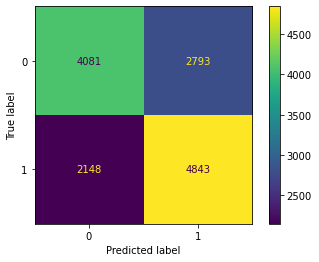

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels= arbol_de_decision.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=arbol_de_decision.classes_)
disp.plot()
plt.show()

El primer modelo a utilizar fue el de Árbol de Decisión y logro un accuracy del 64% en nuestro set de evaluación, es un buen accuracy para nuestro primer algoritmo, sin embargo aun nos falta otros 2 algoritmos

### Random Forest

In [ ]:
X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=10)

In [ ]:
# Importamos el modelo
from sklearn.ensemble import RandomForestClassifier
#Creamos un random forest!
model = RandomForestClassifier(random_state=10, max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', random_state=10)

In [ ]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy_randomForest = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_randomForest)

% de aciertos sobre el set de entrenamiento: 0.96343009057467
% de aciertos sobre el set de evaluación: 0.9542733501622791


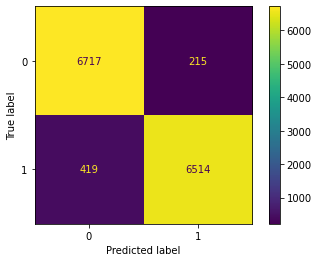

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.9488685544701373
% de recall sobre el set de evaluación: 0.939564402134718
Precisión:
% de precisión sobre el set de entrenamiento: 0.9773291727695345
% de precisión sobre el set de evaluación: 0.9680487442413435
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.9628886030680428
% de f1_score sobre el set de evaluación: 0.9535939101156492


El segundo modelo a utilizar fue el de Random Forest y logro un accuracy del 95% en nuestro set de evaluación, es un accuaracy muy superior a nuestro primero algoritmo (Árbol de Decisión Simple) y uno muy excelente para nuestro objetivo

### Regresión Logistica

In [ ]:
## Separamos las data
X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

In [ ]:
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [ ]:
# Importamos la libreria del modelo
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_regresion = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_regresion)

% de aciertos sobre el set de entrenamiento: 0.5015920121178398
% de aciertos sobre el set de evaluación: 0.4980887125856473


In [ ]:
print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.6349078768393718
% de recall sobre el set de evaluación: 0.630318765325256
Precisión:
% de precisión sobre el set de entrenamiento: 0.5012446917557476
% de precisión sobre el set de evaluación: 0.4985169974903034
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.5602138512315539
% de f1_score sobre el set de evaluación: 0.55672335817568


### Comparación de modelos

In [ ]:
# Desplegamos los valores de cada modelo para compararlos
print('% de aciertos sobre el set de evaluación del Árbol de decisión:',test_accuracy_decisionTree)
print('% de aciertos sobre el set de evaluación del Random Forest:',test_accuracy_randomForest)
print('% de aciertos sobre el set de evaluación de la Regresión Logistica:',test_accuracy_regresion)

% de aciertos sobre el set de evaluación del Árbol de decisión: 0.6436350522899387
% de aciertos sobre el set de evaluación del Random Forest: 0.9542733501622791
% de aciertos sobre el set de evaluación de la Regresión Logistica: 0.4980887125856473


Finalmente, con nuestro modelo de Regresión Logistica se logro un accuracy de 49% el cual queda muy por debajo de nuestros primeros algoritmos. Los 3 algoritmos presentan un accuaracy muy diferente, sin embargo el algoritmo de Random Forest fue el que tuvo mejor rendimiento por lo que es nuestra mejor opción para el proyecto.

Sin embargo, ocuparemos dos metodos para ver si podemos mejorar el rendimiento de nuestro algoritmo de Random Forest(LOOCV y RandomSearchCV). El primero de estos entrenara y testeara nuestro modelo con cada una de nuestras filas reduciendo considerablemente la variabilidad, mientras que el segundo nos ayudara a encontrar el mejor conjunto de hyperparametros para nuestro modelo.

### LOOCV

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

In [ ]:
# Balanceo los datos
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

In [ ]:
#Creamos el modelo 
cv = LeaveOneOut()

In [ ]:
# Decision Tree
model = RandomForestClassifier(random_state=10, max_features="log2")

In [ ]:
# Evaluacion del Modelo
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

### Random Search CV

In [ ]:
import scipy as sp

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

In [ ]:
# Balanceamos la data
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=10)

In [ ]:
#Creamos nuestro objeto Decision Tree
random_forest = RandomForestClassifier()

In [ ]:
# Grilla para Random Search
param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': sp.stats.randint(1, 20),
              'min_samples_split': sp.stats.randint(1, 20),
              'random_state': sp.stats.randint(1, 20),
              'min_samples_leaf': sp.stats.randint(1, 20),
              'max_features': ['auto', 'sqrt', 'log2']}

#Aplicamos la grilla al modelo
model = RandomizedSearchCV(random_forest, param_dist, n_iter=100, random_state=0, cv=5)

In [ ]:
#Entrenamos DecisionTree con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3fae164730>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3fbc308c10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3fc753caf0>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3fcd311df0>},
                   random_state=0)

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'criterion': 'entropy', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'random_state': 6}
Mejor Score: 0.9435221743552594



In [ ]:
#Analizamos qué obtuvimos
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.741158,0.047611,0.126236,0.001823,gini,16,sqrt,1,4,4,"{'criterion': 'gini', 'max_depth': 16, 'max_fe...",0.941267,0.940958,0.942349,0.940185,0.942804,0.941513,0.000948,3
1,1.570005,0.037448,0.105497,0.018309,entropy,10,sqrt,19,5,7,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.863215,0.866306,0.867852,0.858578,0.861030,0.863396,0.003381,47
2,1.578596,0.050413,0.120135,0.012665,gini,13,log2,2,7,8,"{'criterion': 'gini', 'max_depth': 13, 'max_fe...",0.915765,0.919629,0.917311,0.914683,0.922863,0.918050,0.002924,16
3,1.765538,0.068268,0.107048,0.003778,entropy,15,auto,18,6,14,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.898145,0.902009,0.900464,0.892272,0.899057,0.898389,0.003327,30
4,1.356712,0.017477,0.101279,0.010815,gini,10,auto,17,6,16,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.862597,0.864606,0.872488,0.856260,0.858711,0.862932,0.005596,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.931059,0.053546,0.124601,0.010277,entropy,15,sqrt,2,6,7,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.930139,0.928284,0.929675,0.932612,0.931365,0.930415,0.001476,6
96,1.430756,0.018628,0.099347,0.002077,gini,11,log2,15,9,8,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.876043,0.879753,0.884235,0.866615,0.875406,0.876410,0.005822,43
97,1.222304,0.012381,0.076636,0.005143,entropy,6,log2,4,11,19,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.811283,0.811283,0.806955,0.795518,0.805689,0.806145,0.005772,64
98,1.025434,0.028490,0.065588,0.005372,entropy,4,sqrt,15,19,6,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.761824,0.757651,0.766151,0.744049,0.752512,0.756437,0.007664,79


In [ ]:
#Prediccion
prediction = model.predict(X_test)

In [ ]:
#Accuracy
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.9509556437071763


Como pudimos notar, la exactitud de nuestro modelo es igual a la que obtuvimos al inicio. Eso nos refleja que al menor por hyperparametros, nuestro modelo esta 100% optimizado.

## Modelos de Boosting

### Adaboost

El primer algoritmo que ocuparemos sera el de Adaboost, este entrena de forma secuencial los datos a traves de diferentes instancias (aprendices) y los va marcando dependiendo de los errores que comenten en la clasificación

In [ ]:
# Importamos la libreria del modelo
from sklearn.ensemble import AdaBoostClassifier

X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

In [ ]:
# Balanceamos la data
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

In [ ]:
# Separación en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training y 30% test

In [ ]:
# Creamos el modelo AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Se fitea el modelo
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [ ]:
# Predicción en Train
y_train_pred = ada.predict(X_train)
# Predicción en Test
y_test_pred = ada.predict(X_test)

In [ ]:
# Calculo de accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo de accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:', test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7924510804043402
% de aciertos sobre el set de evaluación: 0.7886043995672557


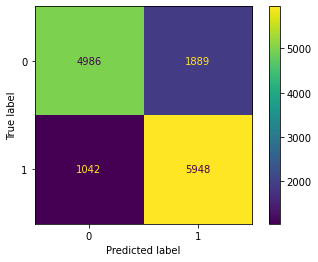

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels= ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ada.classes_)
disp.plot()
plt.show()

In [ ]:
print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.8537569026493764
% de recall sobre el set de evaluación: 0.8509298998569385
Precisión:
% de precisión sobre el set de entrenamiento: 0.7595076447535464
% de precisión sobre el set de evaluación: 0.7589638892433329
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.8038791844365251
% de f1_score sobre el set de evaluación: 0.8023200917245565


### Xgboost

El segundo algoritmo que ocuparemos sera el de XGBoosting el cual genera modelos de predicción "débiles" secuencialmente y cada uno de ellos toma los resultados del modelo anterior para generar un modelo más fuerte con mejor predicción y estabilidad

In [ ]:
# Instalamos la libreria si no la tenemos
!pip install xgboost

     |████████████████████████████████| 173.6 MB 43.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Importamos la libreria del modelo
import xgboost as xgb

X = data_limpia.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = data_limpia.Target #Defino el Target

/root/venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [ ]:
# Balanceamos la data
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    23107
0    23107
Name: Target, dtype: int64

In [ ]:
# Separación en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training y 30% test

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=40, seed=123)

In [ ]:
clf_xgb.fit(X_train, y_train)

/root/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/root/venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

[03:08:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
# Predicción en Train
y_train_pred = clf_xgb.predict(X_train)
# Predicción en Test
y_test_pred = clf_xgb.predict(X_test)

In [ ]:
# Calculo de accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo de accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:', test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9264583140127979
% de aciertos sobre el set de evaluación: 0.9191489361702128


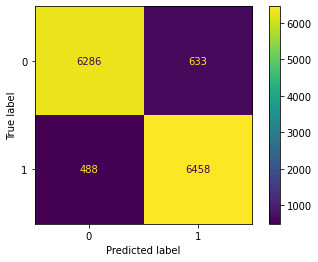

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels= clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

In [ ]:
print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.9371944805395706
% de recall sobre el set de evaluación: 0.9297437374028218
Precisión:
% de precisión sobre el set de entrenamiento: 0.9173834039975772
% de precisión sobre el set de evaluación: 0.9107319136934142
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.9271831287686326
% de f1_score sobre el set de evaluación: 0.9201396309752796


Al implementar los algoritmos de boosting nos dieron mejores resultados que nuestros primeros algoritmos sin embargo, nuestro algoritmo de Random Forest sigue siendo el que mejor exactitud nos esta entregando con un 95%. Nuestro 2do mejor algoritmo seria el de XgBoost con un 91% de exactitud.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3c48f1ed-6b3b-4722-9414-fbe15b9fd114' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>